In [1]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "learning_rate"
tags = ["learning_rate"]
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [3]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 60/60 [00:00<00:00, 323.58it/s]


,Self_Play/Entropies,Training/Policy_loss,Self_Play/Mean_Timesteps,Self_Play/EMA_Reward,Self_Play/Mean_Reward,Self_Play/Mean_Entropy,Self_Play/Timesteps,Self_Play/Max_Reward,Self_Play/Min_Reward,Self_Play/Reward_STD,...,expansion_policy,n_steps_learning,selection_policy,value_loss_weight,max_episode_length,policy_loss_weight,sample_batch_ratio,regularization_weight,tree_evaluation_policy,replay_buffer_multiplier
0,"{'bins': [0.9356843755486306, 0.93640553304318...",1.366788,153.375,-170.877247,-153.375,0.965809,"{'bins': [89, 90.734375, 92.46875, 94.203125, ...",-89,-200,52.049256,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
1,"{'bins': [0.9300659030091528, 0.93089226919062...",1.367470,169.250,-191.507818,-181.625,0.964062,"{'bins': [51, 53.328125, 55.65625, 57.984375, ...",-51,-285,69.296336,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
2,"{'bins': [0.9393457597301852, 0.93984702116292...",0.291989,152.500,-172.569023,-152.500,0.957166,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",-62,-200,54.756604,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
3,"{'bins': [0.942377404321598, 0.942998256894606...",0.285804,169.000,-179.041462,-169.000,0.967869,"{'bins': [79, 80.890625, 82.78125, 84.671875, ...",-79,-200,51.826634,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
4,"{'bins': [0.06655366280499626, 0.0672295913100...",1.076474,17.000,-31.799590,-17.000,0.080699,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-17,-17,0.000000,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
5,"{'values': [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...",1.177611,200.000,-210.307611,-212.375,0.673285,"{'bins': [199.5, 199.515625, 199.53125, 199.54...",-200,-299,35.001786,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
6,"{'values': [2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0...",0.220130,25.250,-37.817442,-25.250,0.393724,"{'bins': [19, 19.28125, 19.5625, 19.84375, 20....",-19,-37,7.285014,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
7,"{'bins': [0.23051386409335667, 0.2320529909973...",0.183794,19.500,-62.557415,-19.500,0.286700,"{'bins': [17, 17.078125, 17.15625, 17.234375, ...",-17,-22,2.000000,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
8,"{'bins': [0.8272568907918809, 0.82834452235246...",1.101531,180.000,-95.396655,-180.000,0.880315,"{'bins': [79, 80.890625, 82.78125, 84.671875, ...",-79,-200,43.031550,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
9,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.852000,56.500,-42.781028,-56.500,0.698875,"{'values': [1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0...",-26,-121,31.959796,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10


In [4]:
df.columns

Index(['Self_Play/Entropies', 'Training/Policy_loss',
       'Self_Play/Mean_Timesteps', 'Self_Play/EMA_Reward',
       'Self_Play/Mean_Reward', 'Self_Play/Mean_Entropy',
       'Self_Play/Timesteps', 'Self_Play/Max_Reward', 'Self_Play/Min_Reward',
       'Self_Play/Reward_STD', 'Self_Play/Runtime_per_Timestep', '_timestamp',
       'Training/Learning_Rate', 'Training/Value_and_Policy_loss',
       'Self_Play/Rewards', 'Self_Play/Timesteps_STD',
       'max_Self_Play/Mean_Reward', 'Self_Play/Cumulative_Reward',
       'Training/Regularization_loss', '_wandb', '_runtime',
       'Self_Play/Min_Timesteps', 'Training/Value_loss',
       'Self_Play/Total_Runtime', 'Training/Replay_Buffer_Size',
       'max_Self_Play/Mean_Reward_step', '_step', 'Self_Play/Total_Timesteps',
       'Training/Value_Simularities', 'Self_Play/Total_Average_Reward',
       'env_id', 'layers', 'puct_c', 'lr_gamma', 'eval_param', 'hidden_dim',
       'iterations', 'model_type', 'norm_layer', 'activation_fn',
      

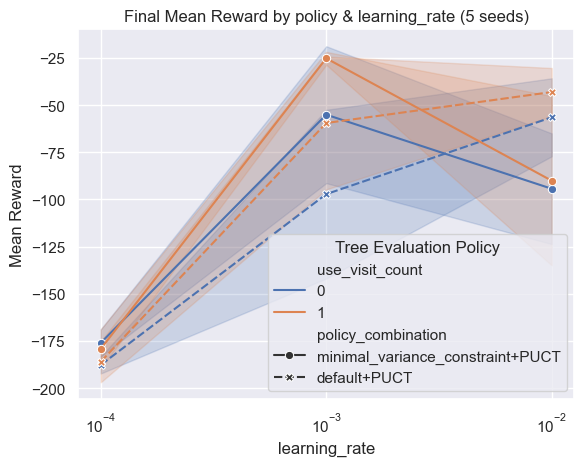

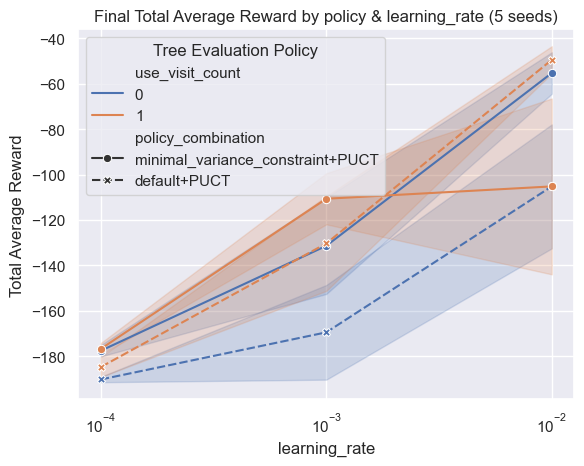

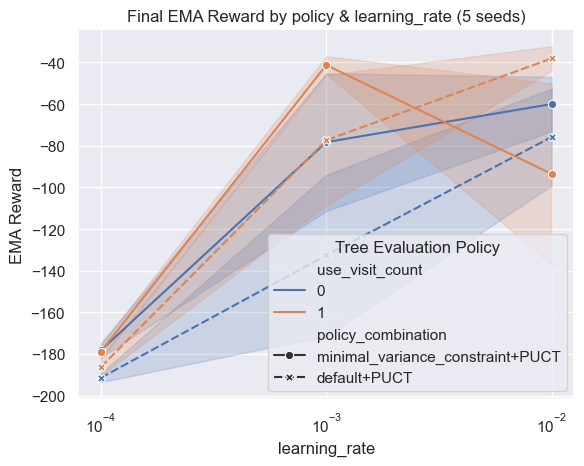

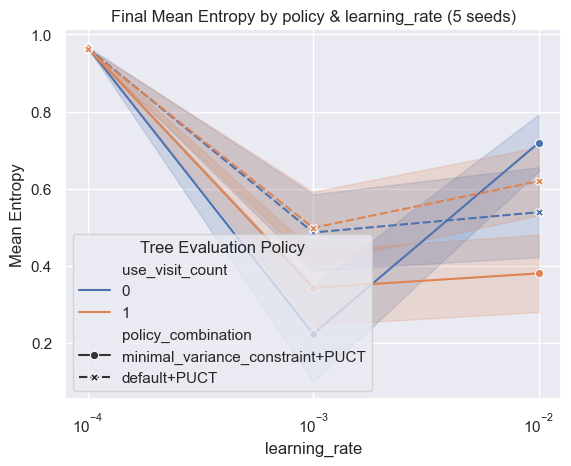

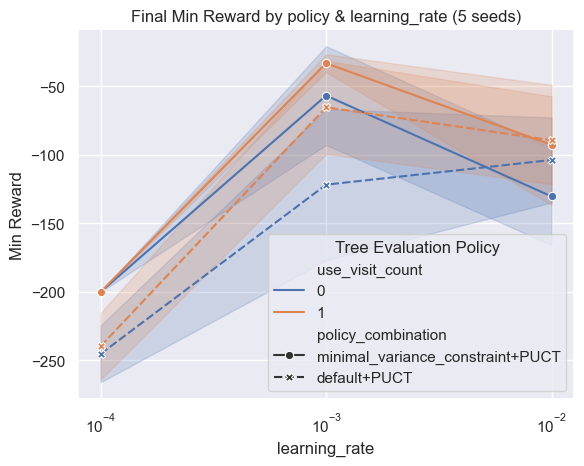

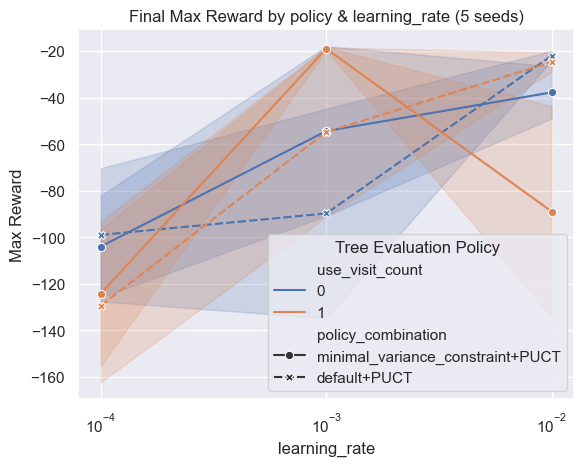

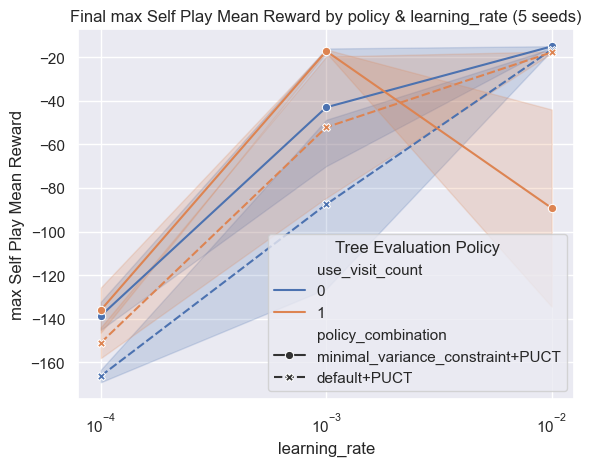

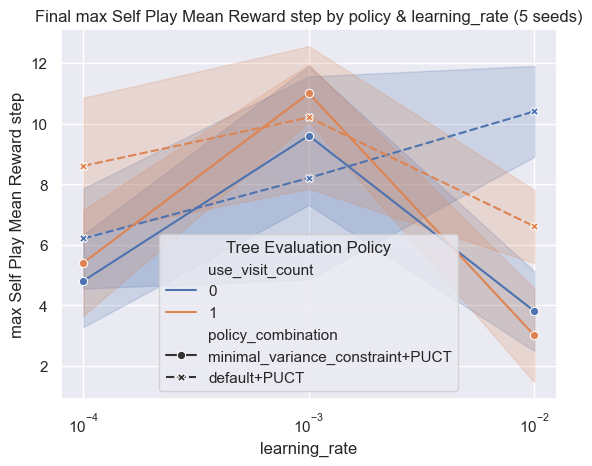

In [7]:

save_folder = 'outfiles/visit_count'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Reward', "Self_Play/Total_Average_Reward", "Self_Play/EMA_Reward", 'Self_Play/Mean_Entropy', 'Self_Play/Min_Reward',
           'Self_Play/Max_Reward',
           'max_Self_Play/Mean_Reward', 'max_Self_Play/Mean_Reward_step'
           ]

estimator = "mean"
for metric in metrics:
    sns.set_theme(style="darkgrid")
    # Create a line plot with confidence intervals
    sns.lineplot(data=df, x=x_metric, y=metric,
                hue="use_visit_count", style="policy_combination",
                markers=True, errorbar="se", estimator=estimator)

    # Customize the plot with titles and labels
    plt.title(f'Final {name_fn(metric)} by policy & {x_metric} (5 seeds)')
    plt.xlabel(x_metric)  # Replace with actual x-axis label
    plt.ylabel(name_fn(metric))
    plt.legend(title='Tree Evaluation Policy')
    plt.gca().set_xscale('log', base=10)

    # save as pdf
    plt.savefig(f'{save_folder}/{name_fn(metric).replace(" ", "_")}_by_policy_{estimator}.pdf')

    # Show the plot
    plt.show()
